In [16]:
from pathlib import Path

import numpy as np
import pandas as pd

from calculate_preferences import calcPref, calcPrefShuffle, calcPrefNulldist

# Change to your data directory
basedir = Path('/Volumes/data-1/behavior/hakan')


### Load data

In [17]:
# Load the raw behavior data to calculate the bootstrapped distributions
data_path = basedir/'Kucukdereli_atal_data/raw_behavior_data_males.h5'
male_data = pd.read_hdf(data_path, key='data')

data_path = basedir/'Kucukdereli_atal_data/raw_behavior_data_females.h5'
female_data = pd.read_hdf(data_path, key='data')

# Load the preferences for all mice to sort the plots
data_path = basedir/'Kucukdereli_atal_data/data_table_all_mice.h5'
data_df = pd.read_hdf(data_path, key='data')


### Sort the data based on preferences on day 5 of AgRP + stress

In [ ]:
males = data_df.sort_values([('test_',5)]).query('@data_df.mouse.sex=="male"')['mouse','mouse'].to_numpy()
females = data_df.sort_values([('test_',5)]).query('@data_df.mouse.sex=="female"')['mouse','mouse'].to_numpy()

# Sort the data by the preference from the day 5 of RTPP
male_data = pd.concat([male_data.query('mouse==@mouse') for mouse in males], ignore_index=True)
female_data = pd.concat([female_data.query('mouse==@mouse') for mouse in females], ignore_index=True)


In [ ]:
# Additional imports and setting up the plots
import matplotlib.pyplot as plt

font = {'family' : 'sans',
        'weight' : 'regular',
        'size'   : 8}
plt.rc('font', **font)
plt.rc('axes', linewidth=0.8)

colors = {'gray':'#D4D4D4', 'darkgray':'#545454', 
          'male':'#FF5E74', 'male_light':'#FFABB6', 
          'female':'#00B7FF', 'female_light':'#9EE3FF'}


## Figure 2A

### Calculate the bootstrapped distributions and plot for individual mice

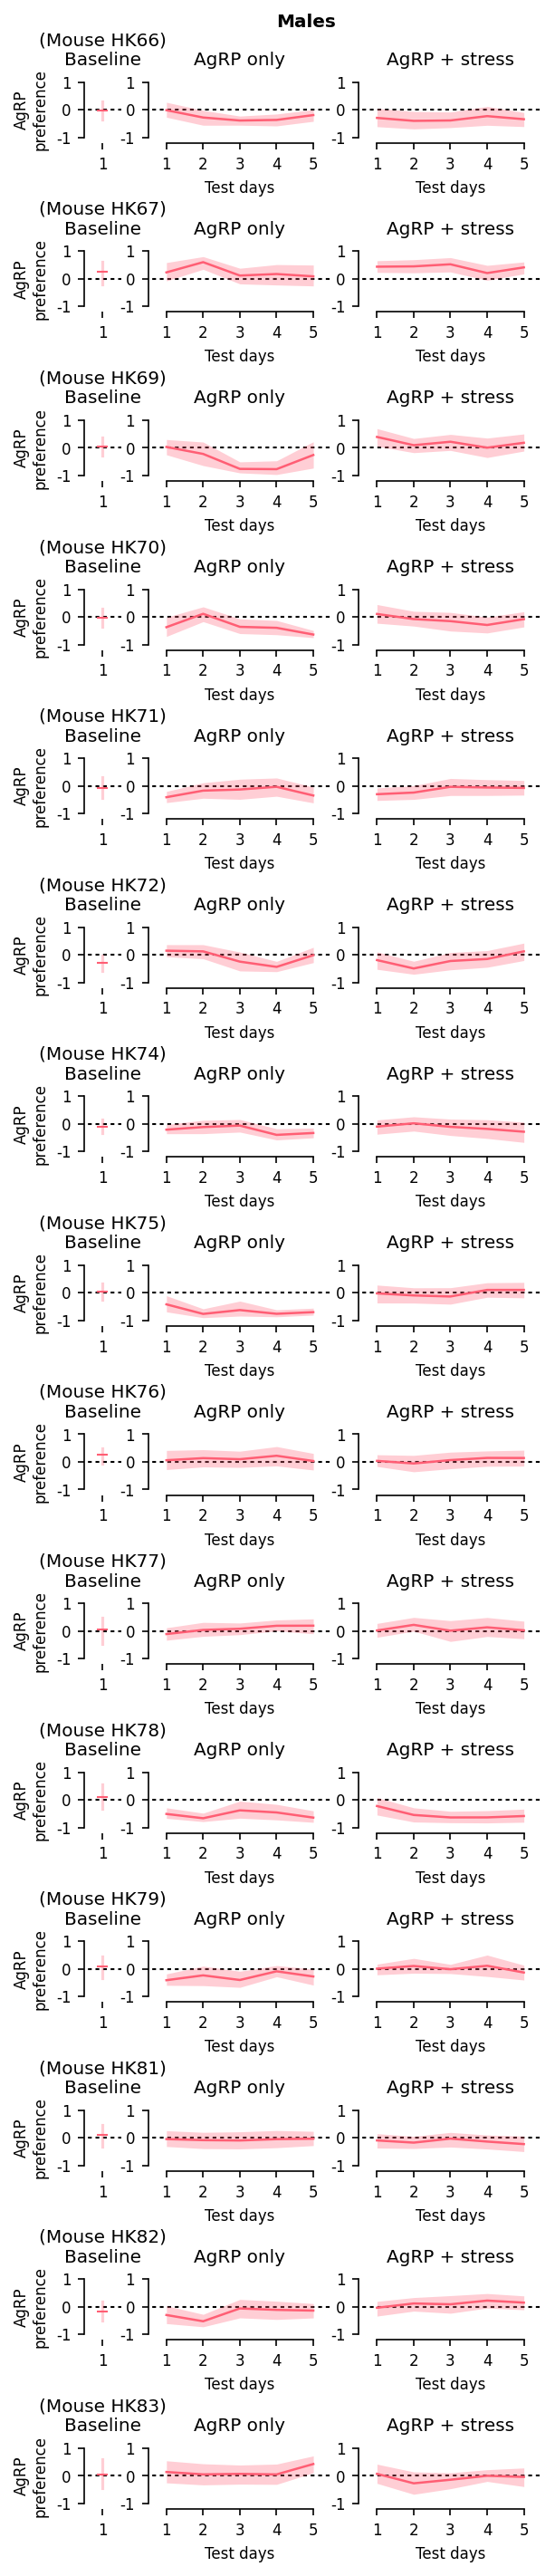

In [5]:
# Males
sex = 'male'
nshuffles = 1000

titles = {'preference':'Baseline', 'test':'AgRP only', 'test_':'AgRP + stress'}

pref_df = male_data.query('session in [1,2]').groupby(['mouse','experiment','day']).apply(calcPref, 'dwell')
shuffle_df = male_data.query('session in [1,2]').groupby(['mouse','experiment','day']).apply(calcPrefShuffle, nshuffles, 'dwell')
mice = shuffle_df.index.get_level_values('mouse').unique().to_numpy()
experiments = shuffle_df.index.get_level_values('experiment').unique().to_numpy()

fig, axs = plt.subplots(len(mice),len(experiments), figsize=(len(experiments)*1.45,len(mice)*1.55), dpi=150,
                        sharex=False, sharey=False, gridspec_kw={'wspace':0.2, 'hspace':1.55, 'width_ratios':[1,5,5]})
fig.suptitle('Males', y=0.9, fontweight='bold')

for (mouse, experiment), df in shuffle_df.apply(np.quantile, q=[.025, .975]).groupby(['mouse','experiment'], sort=False):
    days = df.index.get_level_values('day').unique().to_numpy()
    
    i, j = np.argwhere(mouse==mice).flatten()[0], np.argwhere(experiment==experiments).flatten()[0]
    ax = axs[i,j]

    ax.set_ylim(-1.2,1.2)
    ax.set_yticks([-1,0,1])
    ax.set_yticklabels([-1,0,1])

    ax.spines[['top','right']].set_visible(False)
    ax.spines['left'].set_bounds([-1,1])

    if experiment=='preference':
        ax.set_title(f'(Mouse {mouse})\n{titles[experiment]}')

        ax.set_ylabel('AgRP\npreference')

        ax.set_xlim([0.5, 1.5])
        ax.set_xticks([1])
        ax.set_xticklabels([1])
        ax.spines['bottom'].set_visible(False)

        ax.plot([0.5, 1.5], [0,0], color='k', lw=1, ls=(2,(2,2)), zorder=-1)
        ax.plot(1, pref_df.loc[mouse, experiment].mean(), color=colors[sex], marker='_', lw=1.2, clip_on=False, zorder=2)
        ax.plot([1,1], [np.concatenate(df.to_numpy()).reshape(-1, 2)[:,0].mean(), 
                        np.concatenate(df.to_numpy()).reshape(-1, 2)[:,1].mean()], 
                        color=colors[sex], lw=1.5, alpha=0.3, clip_on=False, zorder=2)
    else:
        ax.set_title(f'{titles[experiment]}')

        ax.set_xlim(0.5, 5.5)
        ax.spines['bottom'].set_bounds(1,5)
        ax.set_xticks(days)
        ax.set_xticklabels(days)
        ax.set_xlabel('Test days')

        ax.plot([days[0]-0.5, days[-1]+0.5], [0,0], color='k', lw=1, ls=(2,(2,2)), zorder=-1)
        ax.fill_between(days, np.concatenate(df.to_numpy()).reshape(-1, 2)[:,0], 
                        np.concatenate(df.to_numpy()).reshape(-1, 2)[:,1],
                        color=colors[sex], alpha=0.3, lw=0, clip_on=False, zorder=1)
        ax.plot(days, pref_df.loc[mouse, experiment].to_numpy(), color=colors[sex], lw=1.2, clip_on=False, zorder=2)


## Figure 2B

### Calculate the bootstrapped distributions and plot for individual mice

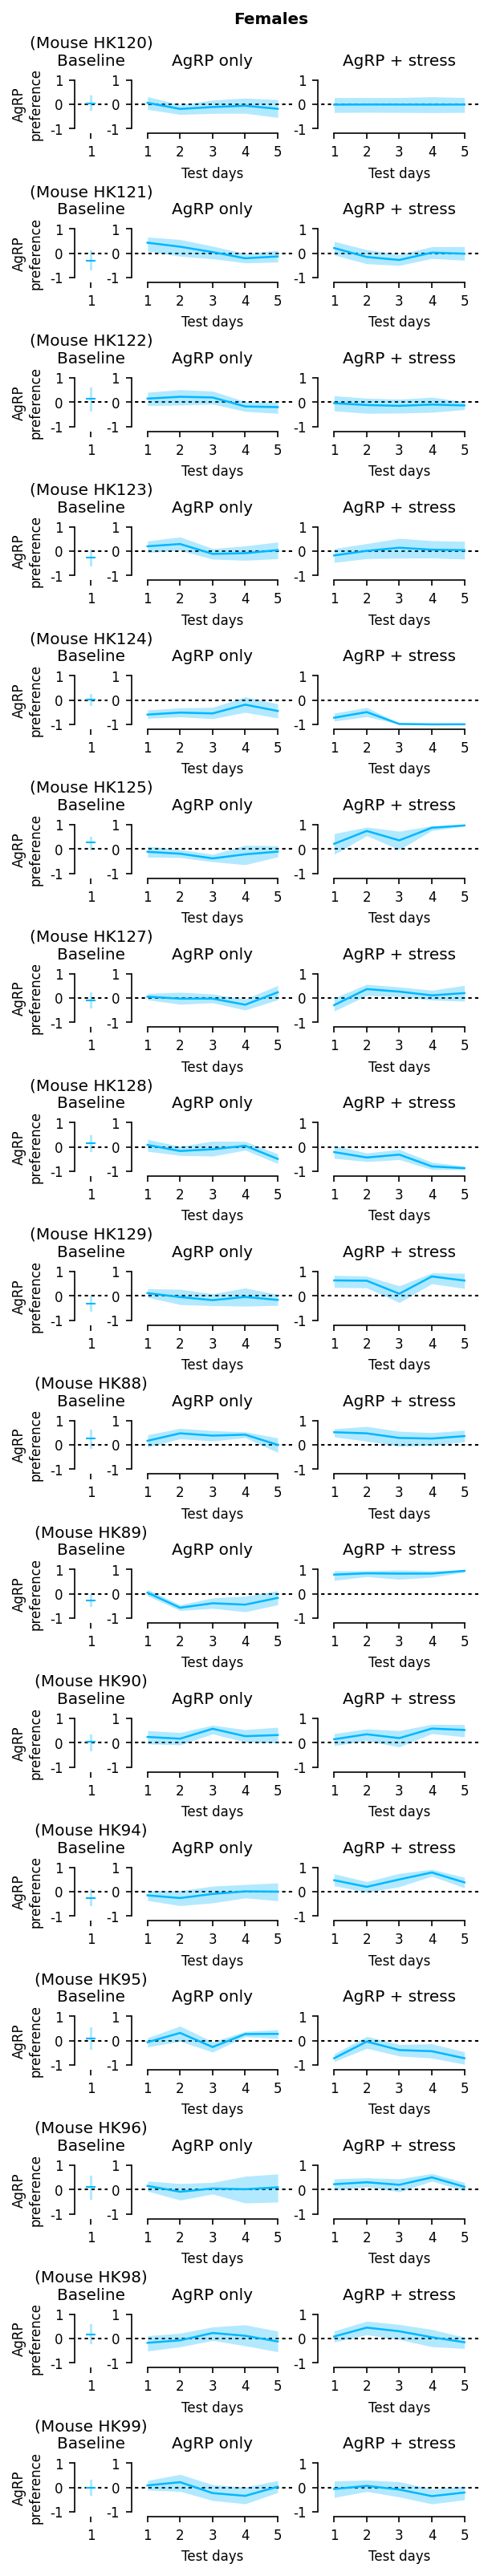

In [6]:
# Females
sex = 'female'
nshuffles = 1000

titles = {'preference':'Baseline', 'test':'AgRP only', 'test_':'AgRP + stress'}

pref_df = female_data.query('session in [1,2]').groupby(['mouse','experiment','day']).apply(calcPref, 'dwell')
shuffle_df = female_data.query('session in [1,2]').groupby(['mouse','experiment','day']).apply(calcPrefShuffle, nshuffles, 'dwell')
mice = shuffle_df.index.get_level_values('mouse').unique().to_numpy()
experiments = shuffle_df.index.get_level_values('experiment').unique().to_numpy()

fig, axs = plt.subplots(len(mice),len(experiments), figsize=(len(experiments)*1.45,len(mice)*1.55), dpi=150,
                        sharex=False, sharey=False, gridspec_kw={'wspace':0.2, 'hspace':1.55, 'width_ratios':[1,5,5]})
fig.suptitle('Females', y=0.9, fontweight='bold')

for (mouse, experiment), df in shuffle_df.apply(np.quantile, q=[.025, .975]).groupby(['mouse','experiment'], sort=False):
    days = df.index.get_level_values('day').unique().to_numpy()
    
    i, j = np.argwhere(mouse==mice).flatten()[0], np.argwhere(experiment==experiments).flatten()[0]
    ax = axs[i,j]

    ax.set_ylim(-1.2,1.2)
    ax.set_yticks([-1,0,1])
    ax.set_yticklabels([-1,0,1])

    ax.spines[['top','right']].set_visible(False)
    ax.spines['left'].set_bounds([-1,1])

    if experiment=='preference':
        ax.set_title(f'(Mouse {mouse})\n{titles[experiment]}')

        ax.set_ylabel('AgRP\npreference')

        ax.set_xlim([0.5, 1.5])
        ax.set_xticks([1])
        ax.set_xticklabels([1])
        ax.spines['bottom'].set_visible(False)

        ax.plot([0.5, 1.5], [0,0], color='k', lw=1, ls=(2,(2,2)), zorder=-1)
        ax.plot(1, pref_df.loc[mouse, experiment].mean(), color=colors[sex], marker='_', lw=1.2, clip_on=False, zorder=2)
        ax.plot([1,1], [np.concatenate(df.to_numpy()).reshape(-1, 2)[:,0].mean(), 
                        np.concatenate(df.to_numpy()).reshape(-1, 2)[:,1].mean()], 
                        color=colors[sex], lw=1.5, alpha=0.3, clip_on=False, zorder=2)
    else:
        ax.set_title(f'{titles[experiment]}')

        ax.set_xlim(0.5, 5.5)
        ax.spines['bottom'].set_bounds(1,5)
        ax.set_xticks(days)
        ax.set_xticklabels(days)
        ax.set_xlabel('Test days')

        ax.plot([days[0]-0.5, days[-1]+0.5], [0,0], color='k', lw=1, ls=(2,(2,2)), zorder=-1)
        ax.fill_between(days, np.concatenate(df.to_numpy()).reshape(-1, 2)[:,0], 
                        np.concatenate(df.to_numpy()).reshape(-1, 2)[:,1],
                        color=colors[sex], alpha=0.3, lw=0, clip_on=False, zorder=1)
        ax.plot(days, pref_df.loc[mouse, experiment].to_numpy(), color=colors[sex], lw=1.2, clip_on=False, zorder=2)


## Figure S2A

### Calculate the null distribution for AgRP preferences on a given day for male mice

In [32]:
female_data.query('mouse=="HK120" & experiment=="test_" & day==1 & session in [1,2]').cueid.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56], dtype=uint16)

In [57]:
def count_true_chunks_in_series(df):
    chunk_start = df & (~df.shift(fill_value=False))
    chunk_id = chunk_start.cumsum()
    
    true_chunk_sizes = df[df].groupby(chunk_id).dt.sum()
    
    return true_chunk_sizes

# Example usage with a DataFrame
df = pd.DataFrame({
    'val': [True, True, True, True, False, False, True, True, False, False, False, True]
})

# Apply the function directly to the 'val' column
true_chunk_counts = count_true_chunks_in_series(df['val'])

print("Number of 'True's in each 'True' chunk:")
print(true_chunk_counts)


AttributeError: 'SeriesGroupBy' object has no attribute 'dt'

In [63]:
df[['cueid','dwell','dt','experiment','day']].to_hdf('/Users/hakan/Documents/aaaaa.h5', key='data')

In [66]:
# Group the data by 'experiment' and 'day'
grouped = df.groupby(['experiment', 'day'])

# Initialize a list to hold the result
result = []

# Iterate over each group
for (experiment, day), group in grouped:
    # Find chunks of 'True's in the 'dwell' column
    # We create a boolean mask that's True at the start of each chunk and use cumsum to identify each chunk
    group['chunk_id'] = (group['dwell'] & ~group['dwell'].shift(1).fillna(False)).cumsum()
    
    # Filter out rows where 'dwell' is False since they are not part of a chunk of Trues
    true_chunks = group[group['dwell']]
    
    # Sum 'dt' within each chunk
    sums = true_chunks.groupby('chunk_id')['dt'].sum().reset_index(name='dt_sum')
    
    # Keep only chunks with True values and their dt sums
    sums['experiment'] = experiment
    sums['day'] = day
    
    # Append the result for this group
    result.append(sums)

# Concatenate all results into a single DataFrame
result_df = pd.concat(result, ignore_index=True)

# Display the first few rows of the result
result_df


,chunk_id,dt_sum,experiment,day
0,1,0.500585,test_,1
1,2,1.902223,test_,1
2,3,0.500585,test_,1
3,4,1.952281,test_,1
4,5,157.283768,test_,1
...,...,...,...,...
366,367,3.904562,test_,1
367,368,1.852164,test_,1
368,369,5.005849,test_,1
369,370,2.903392,test_,1


In [ ]:
def calculate_dt_sum(group):
    # Identify the start of each chunk of 'True' values and assign a unique chunk_id
    group['chunk_id'] = (group['dwell'] & ~group['dwell'].shift(1).fillna(False)).cumsum()
    
    # Filter to include only 'True' chunks
    true_chunks = group[group['dwell']]
    
    # Calculate the sum of 'dt' for each chunk
    sums = true_chunks.groupby('chunk_id')['dt'].sum().reset_index(name='dt_sum')
    
    return sums

# # Apply the function to each group
# result_df_apply = data.groupby(['experiment', 'day']).apply(calculate_dt_sum).reset_index(drop=True)

# # Display the first few rows of the new result
# result_df_apply.head()



def calcPrefNulldist(df, condition):
    df['bout_id'] = (df[condition] & ~df[condition].shift(1).fillna(False)).cumsum()
    stim = df[df[condition]].query('stim!=0').groupby('bout_id')['dt'].sum().reset_index(drop=True)
    neutral = df[df[condition]].query('neutral!=0').groupby('bout_id')['dt'].sum().reset_index(drop=True)

    all_trials = pd.concat([stim, neutral], ignore_index=True)

    pref_list = []
    for n in range(nshuffles):
        stim_t = all_trials.sample(n=len(stim), replace=True).sum()
        neutral_t = all_trials.sample(n=len(neutral), replace=True).sum()

        pref_val = (stim_t - neutral_t) / (stim_t + neutral_t)
        pref_list.append(pref_val)
    
    return pref_list




In [ ]:
condition = 'dwell'
# df = female_data.query('mouse=="HK120" & experiment=="test_" & day==1 & session in [1,2]')
df = female_data.query('mouse=="HK120" & experiment in ["test","test_"] & day in [1,5] & session in [1,2]')
df.groupby(['experiment', 'day']).apply(calcPrefNulldist, 'dwell').reset_index(drop=True)


NameError: name 'female_data' is not defined

In [43]:
condition = 'dwell'
df = female_data.query('mouse=="HK120" & experiment=="test_" & day==1 & session in [1,2]')
df.query(f'session in [1,2] & stim!=0 & {condition}==True').groupby('cueid').dt.sum().reset_index(drop=True)


0     161.688914
1      11.613569
2      30.635794
3       9.010528
4      85.900364
5      32.287724
6      81.645393
7     132.554875
8       3.504094
9      37.744100
10     13.565850
11    130.552535
12     50.759306
13      9.310879
14      1.952281
15    122.443060
16     68.630186
17      2.002339
18     15.618248
19      0.951111
20      1.401638
21      0.250292
22     20.023395
23     66.978256
24      0.650760
25     13.465733
Name: dt, dtype: float64

In [36]:
def calcPrefNulldist(df, nshuffles, condition=None):
    if condition:
        stim = df.query(f'session in [1,2] & stim!=0 & {condition}==True').groupby('cueid').dt.sum().reset_index(drop=True)
        neutral = df.query(f'session in [1,2] & neutral!=0 & {condition}==True').groupby('cueid').dt.sum().reset_index(drop=True)
    else:
        stim = df.query(f'session in [1,2] & stim!=0').groupby('cueid').dt.sum().reset_index(drop=True)
        neutral = df.query(f'session in [1,2] & neutral!=0').groupby('cueid').dt.sum().reset_index(drop=True)
    all_trials = pd.concat([stim, neutral], ignore_index=True)
    print((stim), (neutral), (all_trials))

    pref_list = []
    for n in range(nshuffles):
        stim_t = all_trials.sample(n=len(stim), replace=True).sum()
        neutral_t = all_trials.sample(n=len(neutral), replace=True).sum()
        # print(stim_t, neutral_t)

        pref_val = (stim_t - neutral_t) / (stim_t + neutral_t)
        pref_list.append(pref_val)

    return np.sort(np.array(pref_list))

female_data.query('mouse in ["HK120","HK122"]').groupby(['mouse','experiment','day']).apply(calcPrefNulldist, nshuffles, 'dwell')


0      5.559636
1     31.805123
2    107.235854
3     73.226912
4    131.527956
5     31.304254
6     99.722833
7    114.648702
Name: dt, dtype: float64 0     54.093752
1     42.173092
2     79.688110
3    136.486550
4      0.050087
5    133.681688
6      0.050087
7     45.428734
8     68.919447
9     56.948700
Name: dt, dtype: float64 0       5.559636
1      31.805123
2     107.235854
3      73.226912
4     131.527956
5      31.304254
6      99.722833
7     114.648702
8      54.093752
9      42.173092
10     79.688110
11    136.486550
12      0.050087
13    133.681688
14      0.050087
15     45.428734
16     68.919447
17     56.948700
Name: dt, dtype: float64
0     72.235077
1    117.938906
2     75.388791
3    118.339377
4    133.156829
5    107.927114
Name: dt, dtype: float64 0    115.035486
1    134.958951
2     83.248048
3     60.120809
4    125.347631
5     11.863973
Name: dt, dtype: float64 0      72.235077
1     117.938906
2      75.388791
3     118.339377
4     133.156829
5   

mouse  experiment  day
HK120  preference  1      [-0.703400897064667, -0.5243153688724309, -0.5...
                   2      [-0.3695596714118094, -0.34366773910500664, -0...
       test        1      [-0.6176906417417114, -0.46096027696792935, -0...
                   2      [-0.6338149372707083, -0.5707698826109683, -0....
                   3      [-0.5570903309152329, -0.5469684174970432, -0....
                   4      [-0.5130361139676957, -0.4938749969916469, -0....
                   5      [-0.6664266671855845, -0.6331520026884547, -0....
       test_       1      [-0.49510498122036817, -0.4794159885112488, -0...
                   2      [-0.43372382363631473, -0.410807727599633, -0....
                   3      [-0.5215311004784704, -0.46976436643423664, -0...
                   4      [-0.4805438349742134, -0.4395646771498354, -0....
                   5      [-0.47819111005466786, -0.4445404367650588, -0...
HK122  preference  1      [-0.7560932059637541, -0.72744854261638

0      8.121883
1     18.399575
2    114.658932
3      1.203242
4    104.130565
5    121.477303
6     28.276186
7     26.220648
8      0.250675
Name: dt, dtype: float64 0       1.453917
1      59.861288
2      76.606405
3     166.849552
4       0.050135
5     137.921610
6      55.198725
7      91.045309
8     113.104744
9     164.092123
10      0.050135
11    107.188805
Name: dt, dtype: float64 0       8.121883
1      18.399575
2     114.658932
3       1.203242
4     104.130565
5     121.477303
6      28.276186
7      26.220648
8       0.250675
9       1.453917
10     59.861288
11     76.606405
12    166.849552
13      0.050135
14    137.921610
15     55.198725
16     91.045309
17    113.104744
18    164.092123
19      0.050135
20    107.188805
Name: dt, dtype: float64
0     42.363477
1    126.689357
2    154.263218
3     10.728739
4    149.700997
5      0.050134
6     40.458374
7     43.566700
8      0.050134
9     64.121760
Name: dt, dtype: float64 0    137.217558
1     22.760969
2  

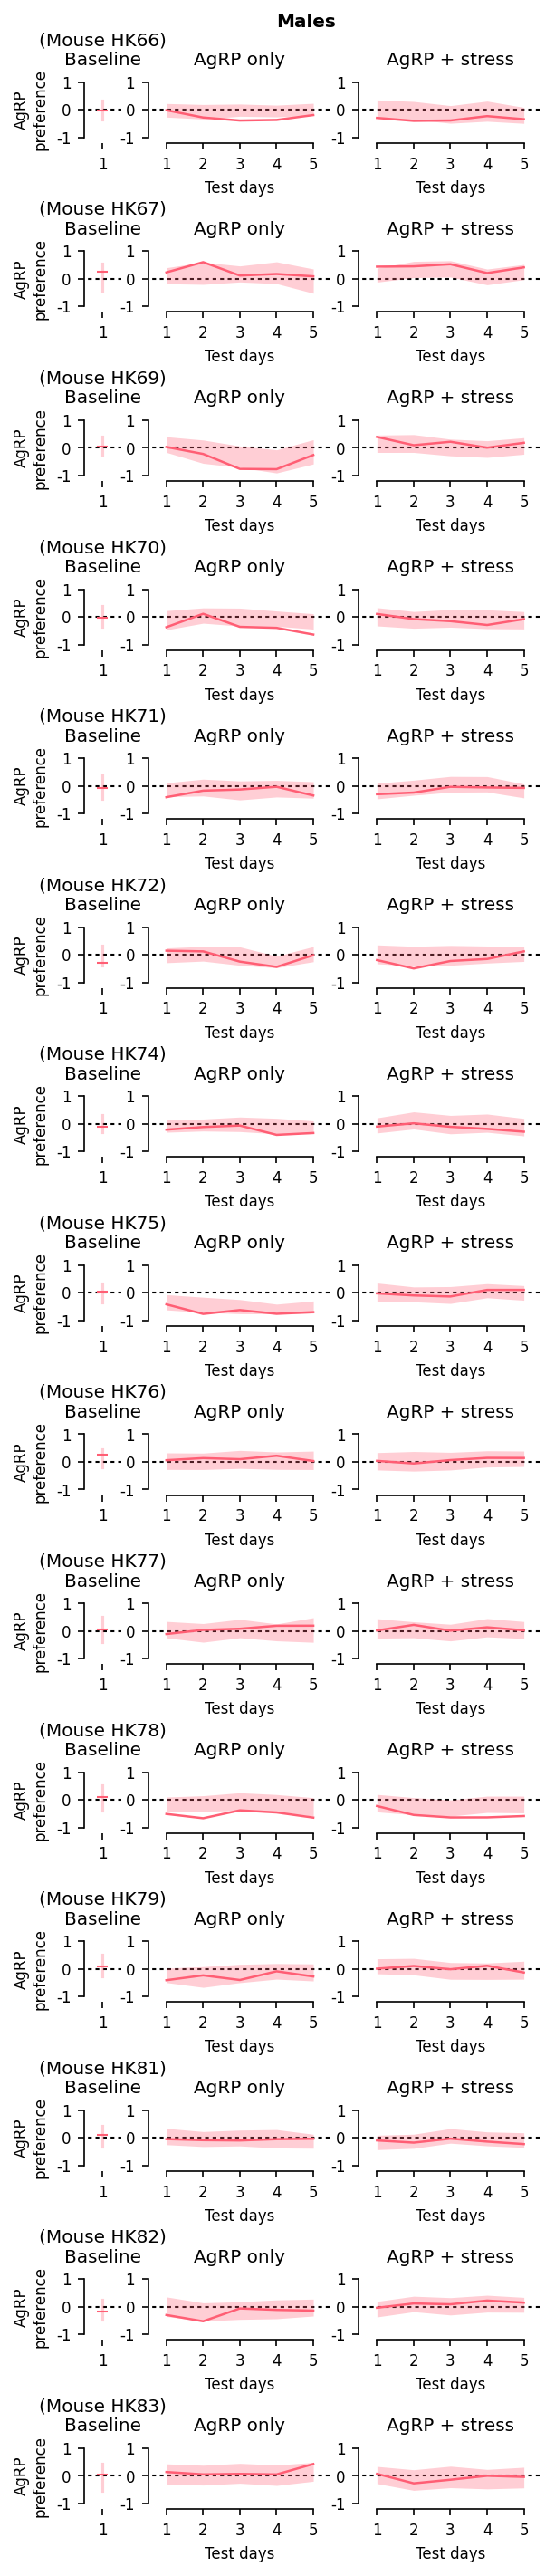

In [38]:
# Males
sex = 'male'
nshuffles = 1000

titles = {'preference':'Baseline', 'test':'AgRP only', 'test_':'AgRP + stress'}

pref_df = male_data.query('session in [1,2]').groupby(['mouse','experiment','day']).apply(calcPref, 'dwell')
null_df = male_data.query('session in [1,2]').groupby(['mouse','experiment','day']).apply(calcPrefNulldist, nshuffles, 'dwell')
mice = null_df.index.get_level_values('mouse').unique().to_numpy()
experiments = null_df.index.get_level_values('experiment').unique().to_numpy()

fig, axs = plt.subplots(len(mice),len(experiments), figsize=(len(experiments)*1.45,len(mice)*1.55), dpi=150,
                        sharex=False, sharey=False, gridspec_kw={'wspace':0.2, 'hspace':1.55, 'width_ratios':[1,5,5]})
fig.suptitle('Males', y=0.9, fontweight='bold')

for (mouse, experiment), df in null_df.apply(np.quantile, q=[.025, .975]).groupby(['mouse','experiment'], sort=False):
    days = df.index.get_level_values('day').unique().to_numpy()
    
    i, j = np.argwhere(mouse==mice).flatten()[0], np.argwhere(experiment==experiments).flatten()[0]
    ax = axs[i,j]

    ax.set_ylim(-1.2,1.2)
    ax.set_yticks([-1,0,1])
    ax.set_yticklabels([-1,0,1])

    ax.spines[['top','right']].set_visible(False)
    ax.spines['left'].set_bounds([-1,1])

    if experiment=='preference':
        ax.set_title(f'(Mouse {mouse})\n{titles[experiment]}')

        ax.set_ylabel('AgRP\npreference')

        ax.set_xlim([0.5, 1.5])
        ax.set_xticks([1])
        ax.set_xticklabels([1])
        ax.spines['bottom'].set_visible(False)

        ax.plot([0.5, 1.5], [0,0], color='k', lw=1, ls=(2,(2,2)), zorder=-1)
        ax.plot(1, pref_df.loc[mouse, experiment].mean(), color=colors[sex], marker='_', lw=1.2, clip_on=False, zorder=2)
        ax.plot([1,1], [np.concatenate(df.to_numpy()).reshape(-1, 2)[:,0].mean(), 
                        np.concatenate(df.to_numpy()).reshape(-1, 2)[:,1].mean()], 
                        color=colors[sex], lw=1.5, alpha=0.3, clip_on=False, zorder=2)
    else:
        ax.set_title(f'{titles[experiment]}')

        ax.set_xlim(0.5, 5.5)
        ax.spines['bottom'].set_bounds(1,5)
        ax.set_xticks(days)
        ax.set_xticklabels(days)
        ax.set_xlabel('Test days')

        ax.plot([days[0]-0.5, days[-1]+0.5], [0,0], color='k', lw=1, ls=(2,(2,2)), zorder=-1)
        ax.fill_between(days, np.concatenate(df.to_numpy()).reshape(-1, 2)[:,0], 
                        np.concatenate(df.to_numpy()).reshape(-1, 2)[:,1],
                        color=colors[sex], alpha=0.3, lw=0, clip_on=False, zorder=1)
        ax.plot(days, pref_df.loc[mouse, experiment].to_numpy(), color=colors[sex], lw=1.2, clip_on=False, zorder=2)


## Figure S2B

### Calculate the null distribution for AgRP preferences on a given day for female mice

0      5.559636
1     31.805123
2    107.235854
3     73.226912
4    131.527956
5     31.304254
6     99.722833
7    114.648702
Name: dt, dtype: float64 0     54.093752
1     42.173092
2     79.688110
3    136.486550
4      0.050087
5    133.681688
6      0.050087
7     45.428734
8     68.919447
9     56.948700
Name: dt, dtype: float64 0       5.559636
1      31.805123
2     107.235854
3      73.226912
4     131.527956
5      31.304254
6      99.722833
7     114.648702
8      54.093752
9      42.173092
10     79.688110
11    136.486550
12      0.050087
13    133.681688
14      0.050087
15     45.428734
16     68.919447
17     56.948700
Name: dt, dtype: float64
0     72.235077
1    117.938906
2     75.388791
3    118.339377
4    133.156829
5    107.927114
Name: dt, dtype: float64 0    115.035486
1    134.958951
2     83.248048
3     60.120809
4    125.347631
5     11.863973
Name: dt, dtype: float64 0      72.235077
1     117.938906
2      75.388791
3     118.339377
4     133.156829
5   

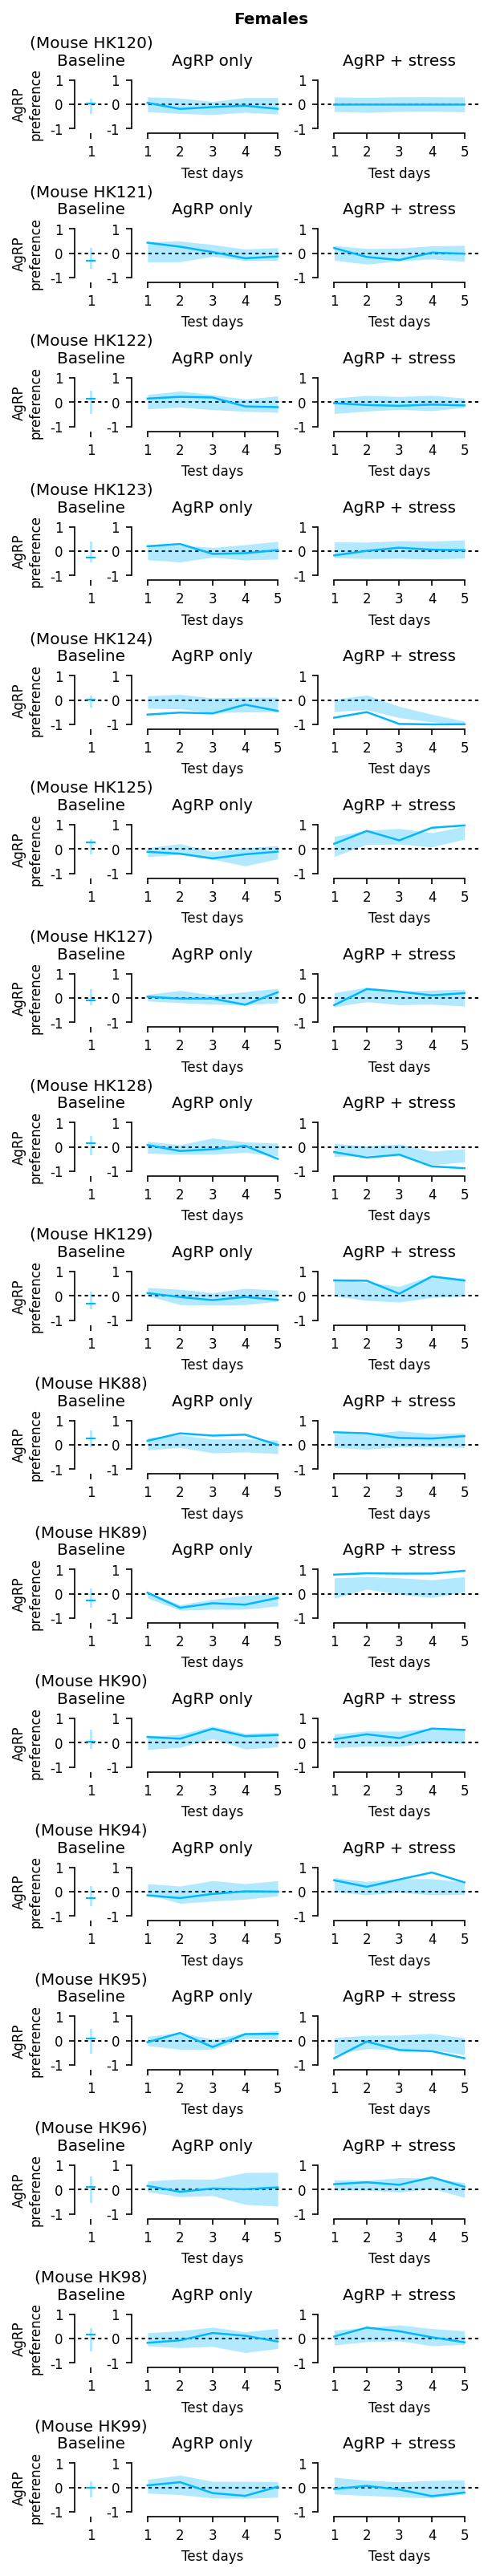

In [37]:
# Males
sex = 'female'
nshuffles = 1000

titles = {'preference':'Baseline', 'test':'AgRP only', 'test_':'AgRP + stress'}

pref_df = female_data.query('session in [1,2]').groupby(['mouse','experiment','day']).apply(calcPref, 'dwell')
null_df = female_data.query('session in [1,2]').groupby(['mouse','experiment','day']).apply(calcPrefNulldist, nshuffles, 'dwell')
mice = null_df.index.get_level_values('mouse').unique().to_numpy()
experiments = null_df.index.get_level_values('experiment').unique().to_numpy()

fig, axs = plt.subplots(len(mice),len(experiments), figsize=(len(experiments)*1.45,len(mice)*1.55), dpi=150,
                        sharex=False, sharey=False, gridspec_kw={'wspace':0.2, 'hspace':1.55, 'width_ratios':[1,5,5]})
fig.suptitle('Females', y=0.9, fontweight='bold')

for (mouse, experiment), df in null_df.apply(np.quantile, q=[.025, .975]).groupby(['mouse','experiment'], sort=False):
    days = df.index.get_level_values('day').unique().to_numpy()
    
    i, j = np.argwhere(mouse==mice).flatten()[0], np.argwhere(experiment==experiments).flatten()[0]
    ax = axs[i,j]

    ax.set_ylim(-1.2,1.2)
    ax.set_yticks([-1,0,1])
    ax.set_yticklabels([-1,0,1])

    ax.spines[['top','right']].set_visible(False)
    ax.spines['left'].set_bounds([-1,1])

    if experiment=='preference':
        ax.set_title(f'(Mouse {mouse})\n{titles[experiment]}')

        ax.set_ylabel('AgRP\npreference')

        ax.set_xlim([0.5, 1.5])
        ax.set_xticks([1])
        ax.set_xticklabels([1])
        ax.spines['bottom'].set_visible(False)

        ax.plot([0.5, 1.5], [0,0], color='k', lw=1, ls=(2,(2,2)), zorder=-1)
        ax.plot(1, pref_df.loc[mouse, experiment].mean(), color=colors[sex], marker='_', lw=1.2, clip_on=False, zorder=2)
        ax.plot([1,1], [np.concatenate(df.to_numpy()).reshape(-1, 2)[:,0].mean(), 
                        np.concatenate(df.to_numpy()).reshape(-1, 2)[:,1].mean()], 
                        color=colors[sex], lw=1.5, alpha=0.3, clip_on=False, zorder=2)
    else:
        ax.set_title(f'{titles[experiment]}')

        ax.set_xlim(0.5, 5.5)
        ax.spines['bottom'].set_bounds(1,5)
        ax.set_xticks(days)
        ax.set_xticklabels(days)
        ax.set_xlabel('Test days')

        ax.plot([days[0]-0.5, days[-1]+0.5], [0,0], color='k', lw=1, ls=(2,(2,2)), zorder=-1)
        ax.fill_between(days, np.concatenate(df.to_numpy()).reshape(-1, 2)[:,0], 
                        np.concatenate(df.to_numpy()).reshape(-1, 2)[:,1],
                        color=colors[sex], alpha=0.3, lw=0, clip_on=False, zorder=1)
        ax.plot(days, pref_df.loc[mouse, experiment].to_numpy(), color=colors[sex], lw=1.2, clip_on=False, zorder=2)
